## Lista de Exercício 03 e 04 - Fundamentos de Matemática para Computação.

# Universidade Federal do ABC - UFABC
## Centro de Matemática, Computação e Cognição - CMCC

## Disciplina:  Fundamentos de Matemática para a Computação -  CCM-007

Responsável: Prof. Dr. Saul Leite

Estudantes: Bruno Aristimunha.

Santo André, 07 de Março de 2019

### Primeira Parte do Curso

#### Objetivos

O objetivo dessa lista é explorar e aplicar os conceitos de sala de aula sobre **Interpolação Polinomial**.

Para alcançar esse objetivo a resolução dos exercícios é necessária.




Bibliotecas empregadas para resolução da Lista 03 e 04

In [0]:
import matplotlib.pylab as plt

import sympy as sy

import numpy as np

x = sy.Symbol('x')
plt.style.use("ggplot")

### Funções desenvolvidas para Lista 03
___

In [0]:
def coeficientes_newton(x_i,f_x):
  #entrada: pares (x, y)
  #saida: coeficientes
  d = f_x.copy()

  for k in range(1,len(f_x)):
    for i in range(len(f_x), k, -1):
      d[i-1] = (d[i-1]-d[i-2]) / (x_i[i-1] - x_i[i-(k+1)])
  return d

In [0]:
def funcao_polinomial(x_i, f_x):
    coeficientes = coeficientes_newton(x_i, f_x)
    
    n = len(x_i) - 1 # grau do polinomio
    p = coeficientes[n]
    
    for k in range(1,n+1):
        p = coeficientes[n-k] + (x -x_i[n-k])*p
    return p


___

# Exercício 01.
___

### a. Determinar um valor aproximado para $\sqrt{1.12}$ usando o polinômio de interpolação de Newton sobre três pontos. (escolha pontos próximos a $x=1.12$)

___


In [0]:
x_e1 = [1,1.1,1.15,1.25,1.30]
f_e1 = [1.000, 1.049, 1.072, 1.118, 1.140]

In [0]:
x_e1[:3]
p_e1 = funcao_polinomial(x_e1[:3].copy(), f_e1[:3].copy())

In [0]:
p_e1 = lambda x: (-0.199999999999964*x + 0.70999999999996)*(x - 1) + 1.0


O valor estimado para $\sqrt{1.12}$ é:

In [0]:
p_e1(1.12)

1.0583200000000001

Esse valor está com a precisão de $10^{-5}$

In [0]:
np.abs(p_e1(1.12) - np.sqrt(1.12))

1.947557416381862e-05

___

### b. Calcular um limitante superior para o erro de aproximação para valores próximos dos pontos de interpolação escolhidos (note que não são igualmente espaçado)

___

Seja $f(x) = \sqrt{x}$, $f'(x) =\frac{1}{2} x^{-\frac{1}{2}}$, $f^{''}(x) = -\frac{1}{4}x^{-\frac{3}{2}}$, $f^{(3)}(x) =\frac{3}{8}x^{\frac{5}{8}}$



Seja a função de erro para o polinômio de grau 3. 

>$|E_n(x)| = (x-x_0)(x-x_1)(x-x_2) \frac{f^{n+1}(\xi)}{(n+1)!}$

>$|E_n(x)| \leq |(x-1)(x-1.1)(x-1.15) |\cdot \left| \frac{3}{8\cdot 3!} \right|$

>$|E_n(x)| \leq \max|(x-1)(x-1.1)(x-1.15) |\cdot  \left| \frac{1}{16} \right|$

Estudando o polinômio temos que:

>$(x-1)(x-1.1)(x-1.15) = -1.265 + 3.515 x - 3.25 x^2 + x^3$

>$\frac{d(-1.265 + 3.515 x - 3.25 x^2 + x^3)}{dx} = 3.515 - 6.5 x + 3 x^2$

>$3.515 - 6.5 x + 3 x^2 =  0 => r_1 = 1.03924, r_2 = 1.12743$

Verificando computacionalmente temos que módulo que maximiza a função é:



In [0]:
f_linha = lambda x: -1.265 + 3.515*x - 3.25*x**2 + x**3
np.abs(f_linha(1.03924)), np.abs(f_linha(1.12743))

(0.00026407647302506554, 7.889128859273065e-05)

O valor que maximiza a função é: 0.00026407647302506554, logo, o limitante superior é:

In [0]:
(0.00026407647302506554/16) 

1.6504779564066596e-05

___
# Exercício 02. 

Mostre que a interpolação de um polinômio de grau $n$ sobre $n+k$ pontos, $k\geq1$, é exata.(Dica: use a fórmula para o erro de interpolação)
___


Da forma do erro temos que a $(n+1)$-derivada  de um polinômio de grau n será 0. Dessa forma, o erro será exato.



___
# Exercício 03


Determine o número de pontos necessários para aproximar a função $f(x) = xe^{3x}$ no intervalo $[0, 0.4]$ com erro inferior a $10^{−7}$ usando pontos igualmente espaçados. (Dica: mostre, usando indução, que $f^{(k)} = (k + 3x)3^{k−1} e^{3x}$, k ≥ 1.)
___

## **Caso base: **
$k  =  1$

$\begin{align}
f_1(x) & = xe^{3x} \\
f'_1(x)   & = e^{3x} + 3x  e^{3x}\\
\\
\text{Exatamente como nossa fórmula nos diz.}\\
\\
f^{(1)}& = (k + 3x)3^{k−1} e^{3x}\\
& = (1 + 3x)3^{1-1} e^{3x}\\
& = (1 + 3x)1\cdot e^{3x}\\
f^{(1)}& = e^{3x} +3x\cdot e^{3x}
\end{align}$

Passo base é verdadeiro :)

## **Para hipótese de indução**

Assumimos que nosso caso $k-1$ é verdade. Ou seja:

$\begin{align}
f_{(k-1)}(x) & = (k-1+3x)3^{k-2} e^{3x}\\
\end{align}$


## **Passo de indução**


$\begin{align}
f_{k-1}& =(k-1+3x)3^{k-2} e^{3x} \\
\text{Ao derivarmos temos então:}\\
f'_{(k-1)}(x)& = (k + 3x)\quad3^{k-1} e^{3 x} \Box \\
\end{align}$



Com a nossa $f^{n+1}$ temos:

> $10^{-7} \leq \frac{h^{n+1}}{4(n+1)} \cdot \max_{t\in[0,0.4]} | f^{n+1}(t) |$

> $10^{-7} \leq \frac{({\frac{0.4}{n}})^{n+1}}{4(n+1)} \cdot(n+1+3\cdot 0.4) 3^{n} e^{3\cdot 0.4} $


In [0]:
import numpy as np

condicao = True
n=1
while condicao:
  
  print(n,"|",(.830029* 0.4**(n + 1)* (3**n)* (1/n)**(n + 1) *(n + 2.2))/(n + 1))
  
  condicao = (10**(-7) <= ((0.4/n)**(n+1))/(4*(n+1)) * (n +1 + 3* 0.4)*(3**(n))*(np.e**(3*0.4)))
  
  n=n +1

1 | 0.6374622720000002
2 | 0.08366692320000002
3 | 0.009207788373333333
4 | 0.0008336811276000002
5 | 6.344840482652165e-05
6 | 4.148563992380952e-06
7 | 2.3732063415057555e-07
8 | 1.205455007460938e-08


Dessa forma, nós observamos que o número de pontos necesários é 9. Isso ocorre, pois, temos o erro para a função de grau $n+1$.

___

# Exercício 04. 


Para gerar uma aproximação para a parte superior do pato, os pontos ilustrados no desenho foram selecionados e são apresentados na tabela que segue.

![duck](https://github.com/bruAristimunha/math-in-computer/raw/master/l3_duck.png)

<table>
  <tr>
    <th>x</th>
    <th>0.9</th>
    <th>1.3</th>
    <th>1.9</th>
    <th>2.1</th>
    <th>2.6</th>
    <th>3.0</th>
    <th>3.9</th>
    <th>4.4</th>
    <th>4.7</th>
    <th>5.0</th>
    <th>6.0</th>
    <th>7.0</th>
    <th>8.0</th>
    <th>9.2</th>
    <th>10.5</th>
    <th>11.3</th>
    <th>11.6</th>
    <th>12.0</th>
    <th>12.6</th>
    <th>13.0</th>
    <th>13.3</th>
  </tr>
  <tr>
    <td>f(x)</td>
    <td>1.3</td>
    <td>1.5</td>
    <td>1.85</td>
    <td>2.1</td>
    <td>2.6</td>
    <td>2.7</td>
    <td>2.4</td>
    <td>2.15</td>
    <td>2.05</td>
    <td>2.1</td>
    <td>2.25</td>
    <td>2.3</td>
    <td>2.25</td>
    <td>1.95</td>
    <td>1.4</td>
    <td>0.9</td>
    <td>0.7</td>
    <td>0.6</td>
    <td>0.5</td>
    <td>0.4</td>
    <td>0.25</td>
  </tr>
</table>

Implemente em Python o polinômio interpolador de Newton para aproximar o desenho da parte superior do pato.

---


In [0]:
import numpy as np
import matplotlib.pylab as plt

In [0]:
x_e4 = [0.9,1.3,1.9,2.1,2.6,3.0,3.9,4.4,4.7,5.0,6.0,7.0,8.0,9.2,10.5,11.3,11.6,12.0,12.6,13.0,13.3]
f_e4 = [1.3,1.5,1.85,2.1,2.6,2.7,2.4,2.15,2.05,2.1,2.25,2.3,2.25,1.95,1.4,0.9,0.7,0.6,0.5,0.4,0.25]
x_e5 = np.arange(np.min(x_e4),np.max(x_e4),0.1)

In [20]:
funcao_polinomial(x_e4.copy(),f_e4.copy())

(x - 0.9)*((x - 1.3)*((x - 1.9)*((x - 2.1)*((x - 2.6)*((x - 3.0)*((x - 3.9)*((x - 4.4)*((x - 4.7)*((x - 5.0)*((x - 6.0)*((x - 7.0)*((x - 8.0)*((x - 9.2)*((x - 10.5)*((x - 11.3)*((x - 11.6)*((x - 12.0)*((-3.074530780108e-11*x + 6.51542950918716e-10)*(x - 12.6) - 1.98371331929768e-9) + 1.46954842089078e-8) - 9.86036108443615e-8) + 6.08595004676425e-7) - 3.45353446933275e-6) + 1.57981716791882e-5) - 4.29023399481625e-5) - 6.34107592999165e-6) + 0.000572931763659381) - 0.00185867502994866) - 0.00254815041559561) + 0.0387469060492263) - 0.18391194861783) + 0.566835125658653) - 0.906324068088771) + 0.624999999999998) + 0.0833333333333337) + 0.5) + 1.3

In [0]:
p = lambda x: (x - 0.9)*((x - 1.3)*((x - 1.9)*((x - 2.1)*((x - 2.6)*((x - 3.0)*((x - 3.9)*((x - 4.4)*((x - 4.7)*((x - 5.0)*((x - 6.0)*((x - 7.0)*((x - 8.0)*((x - 9.2)*((x - 10.5)*((x - 11.3)*((x - 11.6)*((x - 12.0)*((-3.074530780108e-11*x + 6.51542950918716e-10)*(x - 12.6) - 1.98371331929768e-9) + 1.46954842089078e-8) - 9.86036108443615e-8) + 6.08595004676425e-7) - 3.45353446933275e-6) + 1.57981716791882e-5) - 4.29023399481625e-5) - 6.34107592999165e-6) + 0.000572931763659381) - 0.00185867502994866) - 0.00254815041559561) + 0.0387469060492263) - 0.18391194861783) + 0.566835125658653) - 0.906324068088771) + 0.624999999999998) + 0.0833333333333337) + 0.5) + 1.3

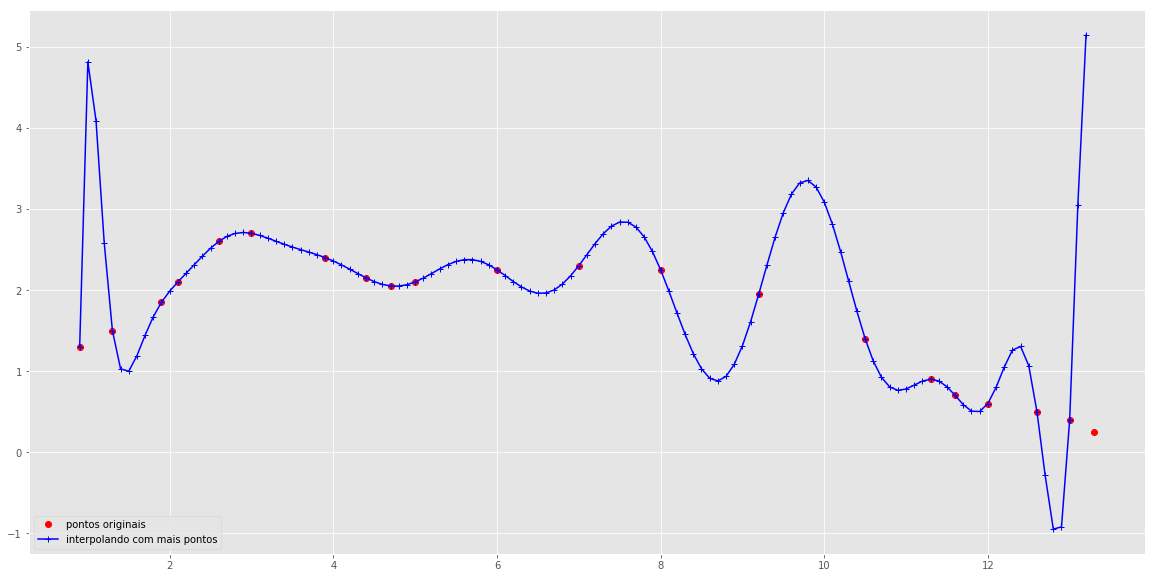

In [27]:
fig, ax = plt.subplots(figsize=(20,10))

ax.plot(x_e4, f_e4, 'o', c='r',label='pontos originais')
#ax.plot(x_e4, list(map(p,x_e4)), c='g', marker='+', label='interpolacao por Newton')
ax.plot(x_e5, list(map(p,x_e5)), c='b', marker='+', label='interpolando com mais pontos')


ax.legend(loc='lower left')

plt.show()

Observamos no comportamento da função o fenômeno de Runge. Em suma, estamos empregando uma função de complexidade muito acima da necessária para descrever o nosso conjunto de dados. Uma das formas para contornar a situação consiste em amostrar o dataset. A técnica escolhida pode ser diversa. Nesse caso, optamos por escolher 1 ponto a cada 4 pontos.

In [0]:
x_04_01 = x_e4[:5]
f_04_01 = f_e4[:5]

x_04_02 = x_e4[4:9]
f_04_02 = f_e4[4:9]

x_04_03 = x_e4[8:13]
f_04_03 = f_e4[8:13]

x_04_04 = x_e4[12:17]
f_04_04 = f_e4[12:17]

x_04_05 = x_e4[16:21]
f_04_05 = f_e4[16:21]


p_04_01 = funcao_polinomial(x_04_01,f_04_01)
p_04_02 = funcao_polinomial(x_04_02,f_04_02)
p_04_03 = funcao_polinomial(x_04_03,f_04_03)
p_04_04 = funcao_polinomial(x_04_04,f_04_04)
p_04_05 = funcao_polinomial(x_04_05,f_04_05)

In [29]:
print(p_04_01)
print(p_04_02)
print(p_04_03)
print(p_04_04)
print(p_04_05)

(x - 0.9)*((x - 1.3)*((-0.906324068088771*x + 2.52828054298642)*(x - 1.9) + 0.0833333333333337) + 0.5) + 1.3
(x - 2.6)*((x - 3.0)*((0.00448897507720958*x + 0.163398692810462)*(x - 3.9) - 0.448717948717949) + 0.25) + 2.6
(x - 4.7)*((x - 5.0)*((0.00489848315935264*x - 0.0504543765413322)*(x - 6.0) - 0.0128205128205137) + 0.166666666666668) + 2.05
(x - 8.0)*((x - 9.2)*((0.00901105067771695*x - 0.10998338081671)*(x - 10.5) - 0.0692307692307691) - 0.25) + 2.25
(x - 11.6)*((x - 12.0)*((-0.053867700926524*x + 0.581232492997194)*(x - 12.6) + 0.083333333333333) - 0.25) + 0.7


In [0]:
p_04_01 = lambda x: (x - 0.9)*((x - 1.3)*((-0.906324068088771*x + 2.52828054298642)*(x - 1.9) + 0.0833333333333337) + 0.5) + 1.3
p_04_02 = lambda x: (x - 2.6)*((x - 3.0)*((0.00448897507720958*x + 0.163398692810462)*(x - 3.9) - 0.448717948717949) + 0.25) + 2.6
p_04_03 = lambda x: (x - 4.7)*((x - 5.0)*((0.00489848315935264*x - 0.0504543765413322)*(x - 6.0) - 0.0128205128205137) + 0.166666666666668) + 2.05
p_04_04 = lambda x: (x - 8.0)*((x - 9.2)*((0.00901105067771695*x - 0.10998338081671)*(x - 10.5) - 0.0692307692307691) - 0.25) + 2.25
p_04_05 = lambda x: (x - 11.6)*((x - 12.0)*((-0.053867700926524*x + 0.581232492997194)*(x - 12.6) + 0.083333333333333) - 0.25) + 0.725

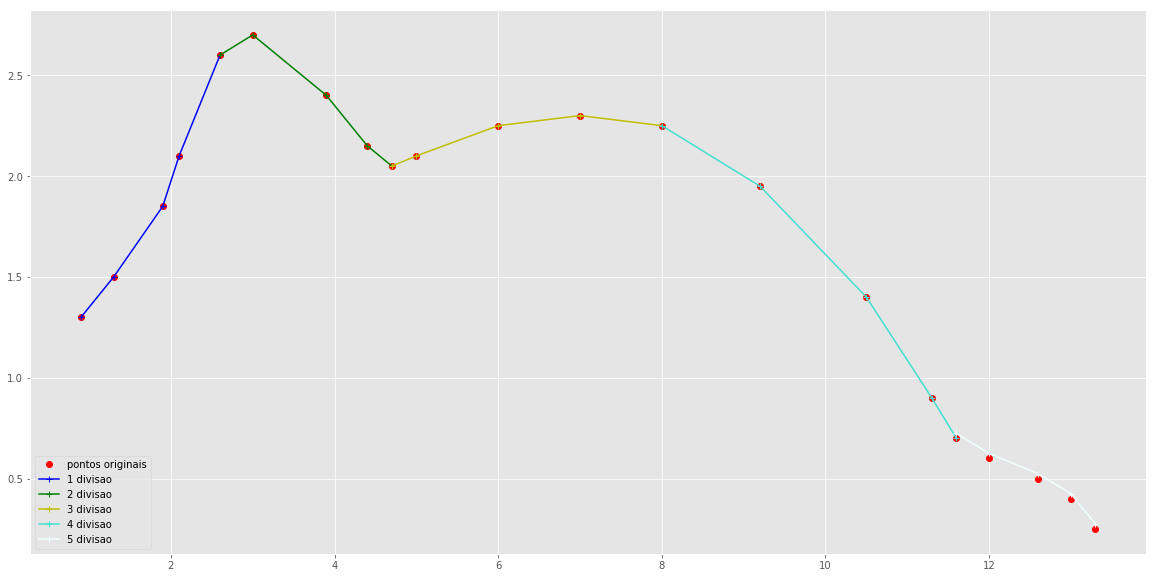

In [37]:
fig, ax = plt.subplots(figsize=(20,10))


ax.plot(x_e4, f_e4, 'o', c='r',label='pontos originais')
ax.plot(x_04_01, list(map(p_04_01,x_04_01)), c='b', marker='+',
        label='1 divisao')
ax.plot(x_04_02, list(map(p_04_02,x_04_02)), c='g', marker='+',
        label='2 divisao')
ax.plot(x_04_03, list(map(p_04_03,x_04_03)), c='y', marker='+',
        label='3 divisao')
ax.plot(x_04_04, list(map(p_04_04,x_04_04)), c='turquoise', marker='+',
        label='4 divisao')
ax.plot(x_04_05, list(map(p_04_05,x_04_05)), c='azure', marker='+',
        label='5 divisao')

ax.legend(loc='lower left')

___
## Exercício 5

Refazer o exercício **E4** da aula passada (do pato) usando splines
___


In [0]:
from scipy.interpolate import interp1d
from scipy.interpolate import CubicSpline

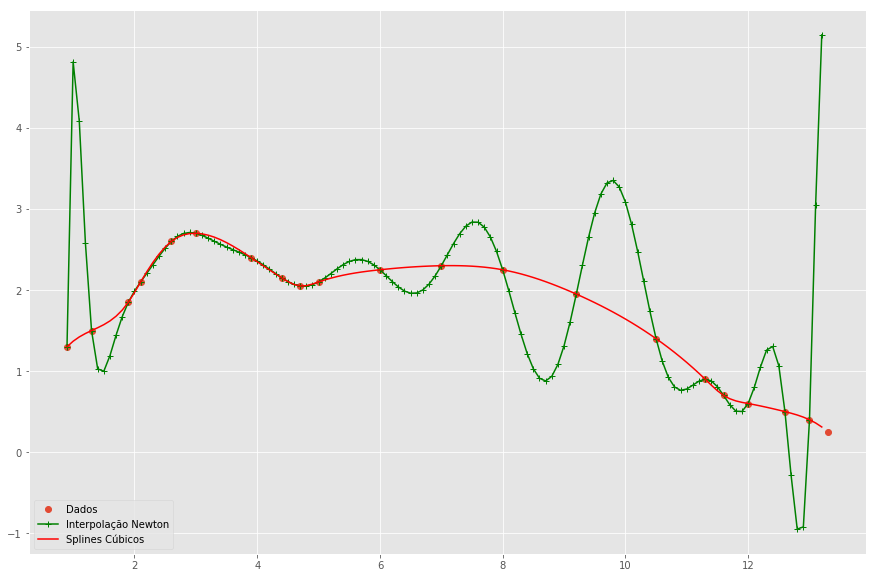

In [41]:

cs = CubicSpline(x=x_e4, y=f_e4)


fig, ax = plt.subplots(figsize=(15,10))
ax.plot(x_e4, f_e4, 'o', label='Dados')
ax.plot(x_e5, list(map(p,x_e5)), c='g', marker='+', label='Interpolação Newton')
ax.plot(x_e5, cs(x_e5), label="Splines Cúbicos", c='r')



ax.legend(loc='lower left')

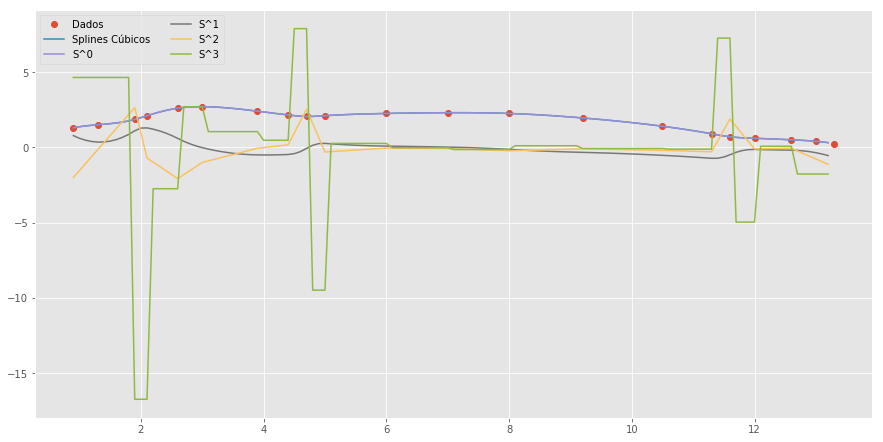

In [42]:
fig, ax = plt.subplots(figsize=(15,7.5))
ax.plot(x_e4, f_e4, 'o', label='Dados')
ax.plot(x_e5, cs(x_e5), label="Splines Cúbicos")
for i in range(np.shape(cs.c)[0]):
  ax.plot(x_e5, cs(x_e5,i), label="S^"+str(i))
ax.legend(loc='best', ncol=2)